# Estatística Descritiva

Este notebook tem como propósito a exploração e análise de um conjunto de dados relacionado ao mercado imobiliário nos Estados Unidos. A motivação por trás desta análise é compreender os fatores que influenciam a variação nos preços das residências, visando identificar as razões pelas quais algumas casas apresentam valores superiores em comparação a outras. Para atingir esse objetivo, empregaremos técnicas de estatística descritiva.

A estatística descritiva é uma abordagem estatística que nos permite resumir e interpretar padrões nos dados. Ao aplicar essas técnicas ao conjunto de dados do mercado imobiliário, buscamos extrair insights significativos sobre as características que impactam diretamente nos preços das residências. Essa compreensão mais profunda pode ser fundamental para investidores, compradores e agentes imobiliários, fornecendo uma base sólida para a tomada de decisões informadas.

Ao longo deste notebook, exploraremos diversas métricas estatísticas, gráficos descritivos e análises comparativas para revelar padrões e tendências presentes no mercado imobiliário. A intenção é não apenas identificar correlações entre variáveis, mas também oferecer uma visão abrangente das nuances que influenciam o valor das propriedades. Essas descobertas podem fornecer insights valiosos para os interessados no setor imobiliário, contribuindo para uma compreensão mais clara do cenário em questão.

## Conhecendo nosso dataset

Para iniciar a análise vamos explorar um pouco do nosso dataset, verificando tipos de dados, valores nulos, algumas estatísticas decritivas, assim como a distribuição dos nossos dados. 

Uma parte importante dessa etapa é entender o que cada coluna do dataset significa, abaixo um resumo com nomes e conteúdo de cada coluna. 

&nbsp;&nbsp;&nbsp;**SalePrice:** Price of sale  
&nbsp;&nbsp;&nbsp;**OverallQual:** Rates the overall material and finish of the house  
&nbsp;&nbsp;&nbsp;**OverallCond:** Rates the overall condition of the house  
&nbsp;&nbsp;&nbsp;**BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)  
&nbsp;&nbsp;&nbsp;**TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)  
&nbsp;&nbsp;&nbsp;**GrLivArea:** Above grade (ground) living area square feet  
&nbsp;&nbsp;&nbsp;**TotalBsmtSF:** Total square feet of basement area  
&nbsp;&nbsp;&nbsp;**YearBuilt:** Original construction date  
&nbsp;&nbsp;&nbsp;**MSZoning:** Identifies the general zoning classification of the sale  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;A    Agriculture  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;C    Commercial  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;FV    Floating Village Residential  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;I     Industrial  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;RH    Residential High Density  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;RL    Residential Low Density  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;RP    Residential Low Density Park   
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;RM    Residential Medium Density  
&nbsp;&nbsp;&nbsp;**Utilities:** Type of utilities available  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;AllPub    All public Utilities (E,G,W,& S)      
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;NoSewr    Electricity, Gas, and Water (Septic Tank)  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;NoSeWa    Electricity and Gas Only  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;ELO       Electricity only      
&nbsp;&nbsp;&nbsp;**BldgType:** Type of dwelling  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;1Fam      Single-family Detached      
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;2FmCon    Two-family Conversion; originally built as one-family dwelling  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;Duplx     Duplex  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;TwnhsE    Townhouse End Unit  
&nbsp;&nbsp;&nbsp;      &nbsp;&nbsp;&nbsp;&nbsp;TwnhsI    Townhouse Inside Unit  

In [147]:
#Importando pacotes para realizar a análise de dados.

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [152]:
#Lendo o arquivo para iniciar as análises

df = pd.read_csv('../../data/Aula01 - Estatistica Descritiva/house_price.csv')

### Conhechendo a dimensão do nosso dataset

Vamos iniciar verficando qual o tamanho do nosso dataset, valores nulos e tipos de dados.

Como é possível ver nosso dataset possui 1460 linhas e 12 colunas.

In [153]:
#shape

df.shape

(1460, 12)

Nosso dataset possui 12 colunas, sendo 8 númericas e 4 categóricas.

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   MSZoning      1460 non-null   object
 10  Utilities     1460 non-null   object
 11  BldgType      1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


Nosso dataset não possui nenhum valor nulo, o que facilitará nossa análise.

In [149]:
df.isnull().sum()

Unnamed: 0      0
SalePrice       0
OverallQual     0
OverallCond     0
BedroomAbvGr    0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
MSZoning        0
Utilities       0
BldgType        0
dtype: int64

Antes de iniciarmos vamos remover a coluna "Unnamed: 0" que provavelmente era apenas um índice de algum dataframe exportado e não será importante na nossa análise.

In [155]:
#Removendo coluna que não iremos utilizar
df = df[[ 'SalePrice', 'OverallQual', 'OverallCond', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'MSZoning',
       'Utilities', 'BldgType']] 

## Analisando variavéis númericas 

Agora que conhecemos o nosso dataset vamos iniciar nossa análise partindo das variaveís numericas. Abaixo algumas das principais estatísticas descritivas de cada coluna:

In [145]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.00,6.0,7.00,14.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0


Na tabela acima podemos verificar as principais estatísticas de cada coluna, porém é sempre interessante verificarmos através de gráficos a distribuição dos dados, para tal será plotado para cada variável um boxplot e um histograma, dois tipos de gráficos que nos ajudam a compreender melhor como nossos dados estão distribuídos.

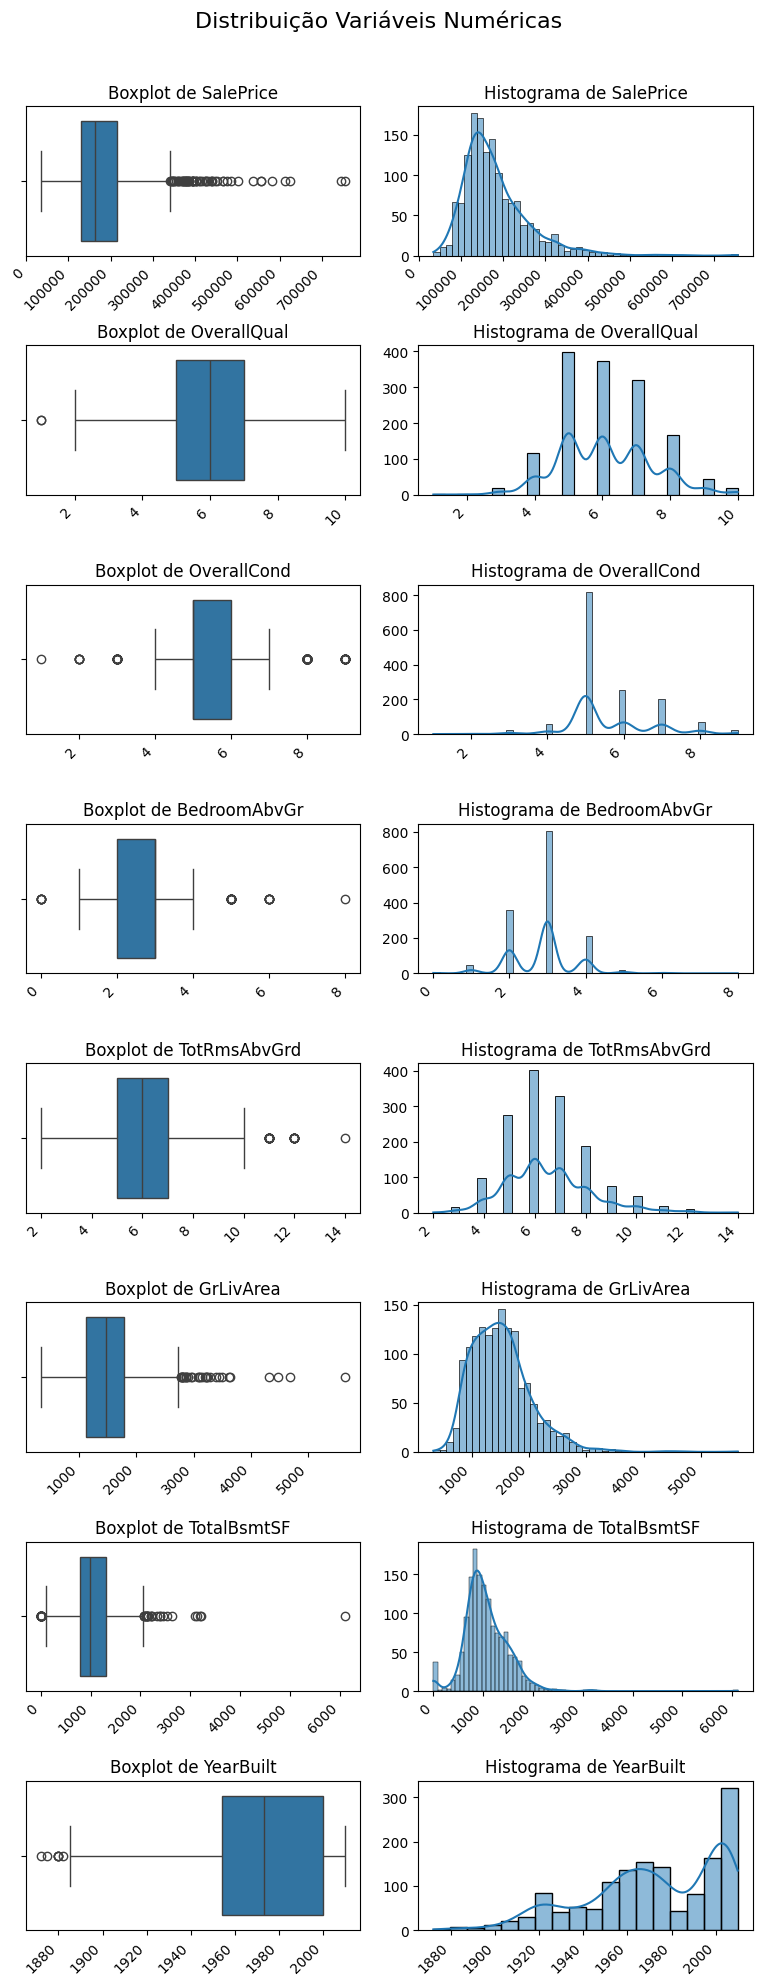

In [157]:

fig,axes = plt.subplots(ncols=2,nrows=8,figsize = (8,20))
axes = axes.flatten()
fig.suptitle('Distribuição Variáveis Numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.6)
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.boxplot(x=df[col], ax=axes[i*2])
    axes[i*2].set(xlabel='')
    axes[i*2].set_title(f'Boxplot de {col}')
    axes[i*2].set_xticklabels(axes[i*2].get_xticklabels(), rotation=45, ha='right') 
    # Histograma à direita
    sns.histplot(df[col], ax=axes[i*2 + 1], kde=True)
    axes[i*2 + 1].set_title(f'Histograma de {col}')
    axes[i*2 + 1].set(xlabel='',ylabel='')
    axes[i*2 + 1].set_xticklabels(axes[i*2 + 1].get_xticklabels(), rotation=45, ha='right') 

Vamos dar uma olhada na nossa variável que queremos concentrar nossa análise, o preço de venda:

SalePrice (Preço de Venda): possuímos uma grande amplitude do preço de venda, indo de 34.900 até 755.000,00. Com uma média de 180.921,19, mediana  de  163000 e desvio padrão 79.442,50.  Temos um desvio padrão alto, o que significa que nossos valores estão desviando muito da média, o que é percepítivel principalmente no 4° quartil, onde os valores vão de 214.000 até 755.000,00, fazendo com que nossa distribuição de dados tenha uma cauda longa para a direita.  

Todas as outras estatísticas a respeito das nossas varáveis são interessantes para que possamos conhecer nossos dados, porém só gerarão valor se  as analisarmos em relação a nossa variável resposta (preço de venda). Para tal análise seria interessante termos a classificação do que seria um imóvel caro ou barato, como nosso dataset não possui tal informação vamos definir de forma arbitrária que imóveis acima do 3° quartil de preço serão consideradas caros (Expensive) e o restante serão consideradas baratos (cheap).  

Para prosseguirmos com nossa análise poderíamos adotar duas metodologias: análise univariada e análise multivariada, nesse início iremos focar na análise univariada.


Criando nossa coluna de classificação de preço:

In [158]:
df['CatPrice'] = np.where(df['SalePrice'] > df['SalePrice'].quantile(0.75),'Expensive','Cheap')

Com nossa coluna criada, podemos verificar como é a distribuição do preço das casas para cada uma das categorias. O que nos permite verificar que na categoria Cheap temos dados menos dispersos e já na categoria Expensive possuímos uma alta variação na distribuição dos nossos dados, com uma cauda grande para a direita.

Text(0.5, 1.0, 'Distribuição de preço de venda por categoria')

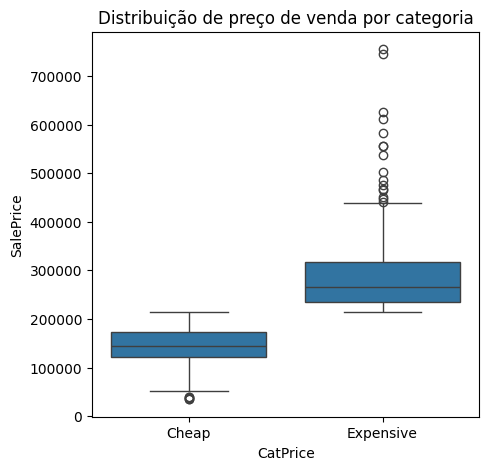

In [180]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.boxplot(x='CatPrice', y= 'SalePrice',data=df) 
ax.set_title('Distribuição de preço de venda por categoria')

Agora vamos verificar a distribuição das nossas outras variáveis numéricas para cada uma das categorias.

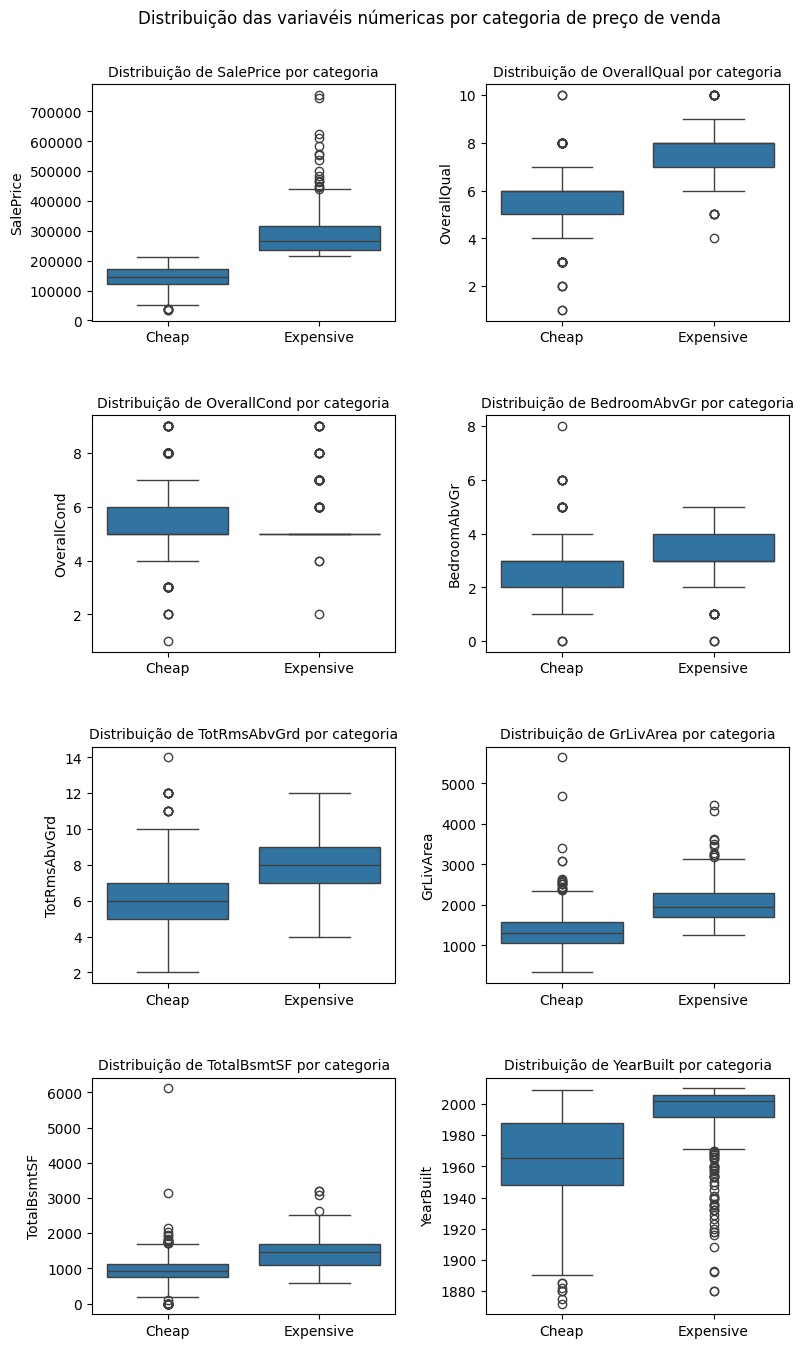

In [198]:
fig, ax = plt.subplots(nrows=4,ncols=2,figsize=(9,15))
plt.subplots_adjust(hspace=0.4,wspace=0.299,top=0.93)
##plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Distribuição das variavéis númericas por categoria de preço de venda')
ax = ax.flatten()
for i,col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.boxplot(x='CatPrice',y=col,data=df,ax = ax[i])
    ax[i].set(xlabel='')
    ax[i].set_title(f'Distribuição de {col} por categoria',fontsize=10)



Ao examinarmos os gráficos, notamos algumas observações intrigantes:

Um ponto notável é a presença de sobreposição nos boxplots de todas as categorias, sugerindo que algumas instâncias nas categorias "cheap" possuem características semelhantes às da categoria "expensive". Isso indica que, exclusivamente com uma análise descritiva, pode não ser suficiente para afirmar completamente a causalidade de uma variável sobre a outra. Em casos como esses, seria prudente conduzir análises mais aprofundadas, como testes de hipóteses.

Ao adentrarmos a análise dos gráficos, destacam-se os seguintes pontos: Casas classificadas como caras tendem a exibir notas mais elevadas de qualidade do material, bem como um maior número de quartos, cômodos, e maior área total e de porão. Entretanto, dois aspectos relevantes merecem atenção: ao avaliar a nota da condição geral para casas da categoria "expensive", percebemos que o boxplot não consegue representar efetivamente a distribuição dos dados. Isso pode ser atribuído à possível concentração significativa de dados em um único ponto. Essa observação será mais detalhada no trecho de código abaixo:


In [204]:
df[df['CatPrice']=='Expensive']['OverallCond'].value_counts()

OverallCond
5    284
7     32
6     25
8      9
9      9
4      2
2      1
Name: count, dtype: int64

Como foi observado a grande maioria dos dados estão contidos na nota 5, o que faz com que o boxplot não seja uma boa representação e também torna a variável pouco explicativa para nossa análise. A princípio pode se tratar de algum erro de preenchimento ou uma imputação de dados feita de maneira equivocada.  

Outro ponto relevante é a nossa variável de área total, o boxplot mostra que as casas mais caras tendem a possuir uma área total maior, porém também é perceptível que temos várias casas da categoria cheap com áreas tão grandes quanto imóveis da categoria expensive. Uma abordagem interessante seria criar uma nova variável de preço por pé quadrado e reclassificar as casas entre caras e baratas por essa variável, a fim de que possamos rever nossa análise nessa nova perspectiva. Vamos lá: 

In [207]:

df['PriceToArea'] = df['SalePrice'] / df['GrLivArea']
df.PriceToArea.describe()

count    1460.000000
mean      120.572878
std        31.391081
min        28.358738
25%        99.822008
50%       120.099031
75%       138.700041
max       276.250881
Name: PriceToArea, dtype: float64

Podemos verificar que nessa nova variável também temos uma grande dispersão dos dados entre o 3° e 4° quartil, porem temos uma média e mediana mais próximas, assim como um desvio padrão menor. 

Assim sendo, vamos seguir a mesma premissa de que imóveis acima do terceiro quartil serão considerados caros e o restante dos imóveis como baratos, além vamos verificar novamente nossas outras variáveis para cada uma das categorias.

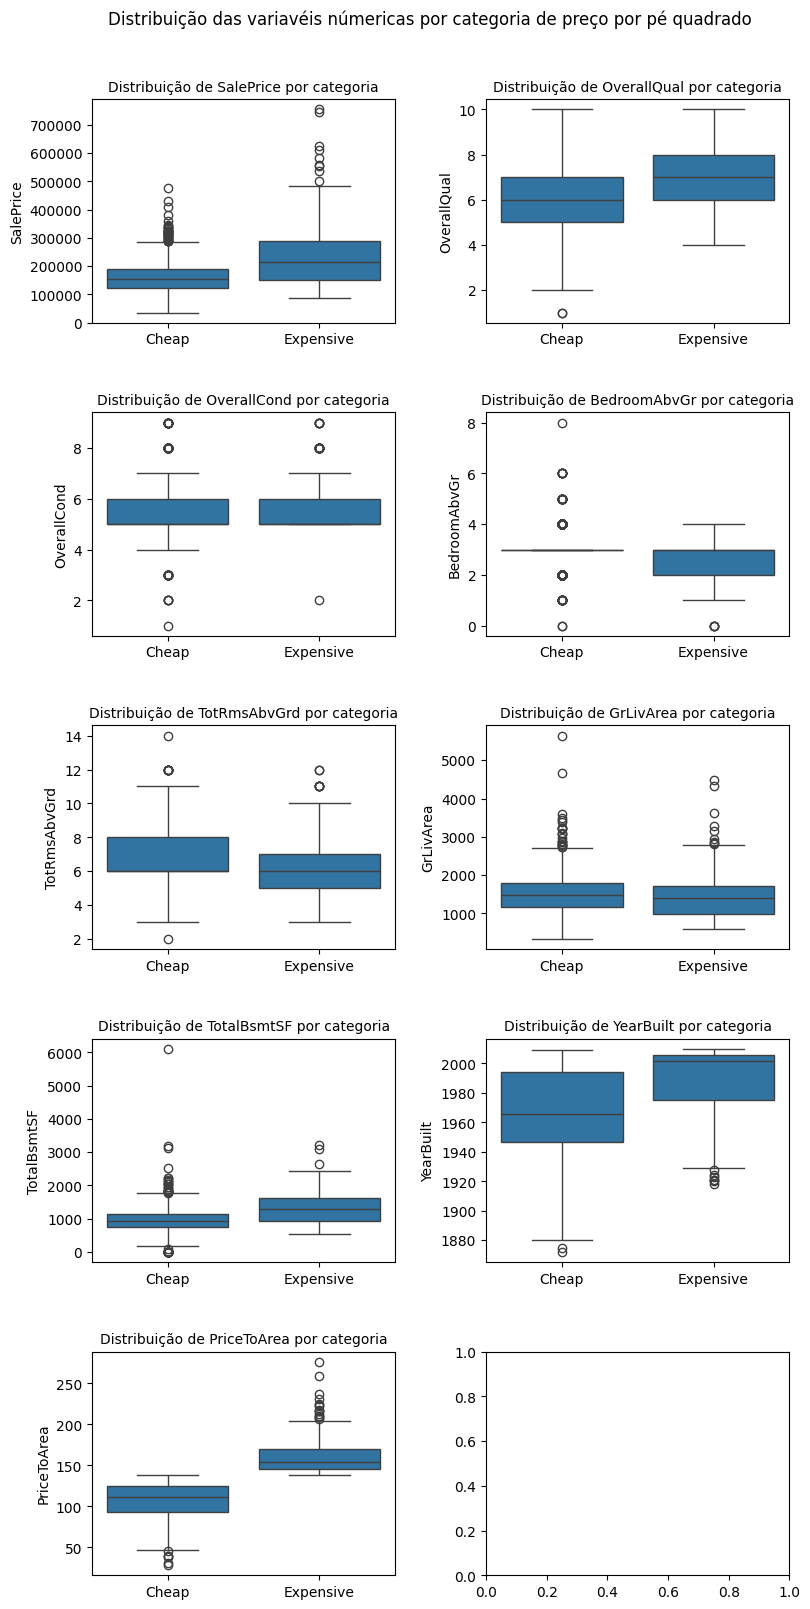

In [210]:
df['CatPriceToArea'] = np.where(df['PriceToArea']> df['PriceToArea'].quantile(0.75),'Expensive','Cheap')
fig, ax = plt.subplots(nrows=5,ncols=2,figsize=(9,18))
plt.subplots_adjust(hspace=0.4,wspace=0.299,top=0.93)
##plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Distribuição das variavéis númericas por categoria de preço por pé quadrado')
ax = ax.flatten()
for i,col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.boxplot(x='CatPriceToArea',y=col,data=df,ax = ax[i])
    ax[i].set(xlabel='')
    ax[i].set_title(f'Distribuição de {col} por categoria',fontsize=10)

Verificando os dados pela perspectiva do preço por pé quadrado, verificamos que na grande maioria das variavéis temos uma sobreposição dos boxplots o que diz que a variável pode não ser totalmente explicada pelas outras variávies, porém percebemos que algumas mudanças nas tendências que foram verificadas utilizando como variável alvo o preço total do imóvel, como por exemplo: o número total de cômodos não influencia tanto no preço por pé quadrado, tendo nesse caso um comportamento inesperado, onde imóveis com menos cômodos possuem valor maior e a área total do imóvel não influencia diretamente no preço por pé quadrado. 

Uma variável relevante para análise, embora ausente em nosso conjunto de dados, seria a localização de cada imóvel. Uma hipótese é que imóveis mesmo sendo menores em regiões mais valorizadas podem ter preços mais altos, enquanto alguns imóveis considerados caros têm como fator impulsionador de preço a sua área total, resultando em uma situação em que o valor não reflete necessariamente que o imóvel esteja caro, mas sim que seja um imóvel de grande extensão.

Um comportamento interessante foi observado no boxplot da categoria "cheap" na variável que indica a quantidade de quartos. Vamos explorar as razões por trás desse padrão:

In [216]:
print(df[df['CatPriceToArea']=='Cheap']['BedroomAbvGr'].value_counts()) 
print(df[df['CatPriceToArea']=='Expensive']['BedroomAbvGr'].value_counts()) 

BedroomAbvGr
3    615
2    231
4    197
1     21
5     21
6      7
0      2
8      1
Name: count, dtype: int64
BedroomAbvGr
3    189
2    127
1     29
4     16
0      4
Name: count, dtype: int64


Como podemos perceber a grande maioria dos dados da categoria cheap estão concentrados entre 2 e 4, porém com uma variação grande entre outras categorias,podemos notar também que não é uma variável explicativa para o preço por pé quadrado. Vamos então iniciar a análise de nossas variáveis categóricas.

## Análise variáveis categóricas 

Agora que já analisamos nossas variavéis númericas entre si, vamos analisar nossas variáveis categóricas em relação a nossa variável de preço total e preço por pé quadrado. 

In [239]:
for col in df.columns: 
    if df[col].dtypes == 'object':
        print(df[col].value_counts(),'\n')

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64 

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64 

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64 

CatPrice
Cheap        1098
Expensive     362
Name: count, dtype: int64 

CatPriceToArea
Cheap        1095
Expensive     365
Name: count, dtype: int64 



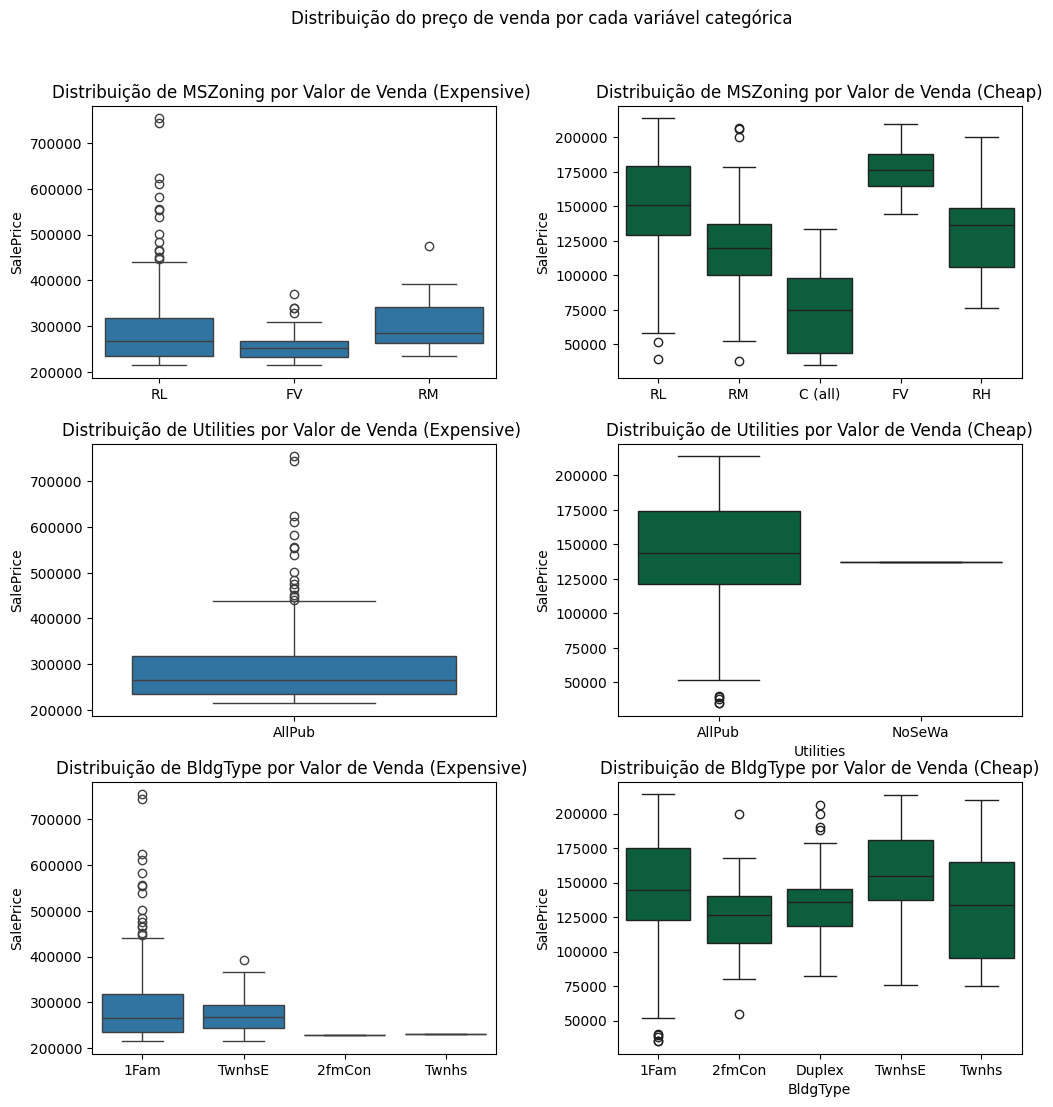

In [269]:
colunas_categoricas = [x for x in df.columns if df[x].dtypes == 'object' and x not in ['CatPrice','CatPriceToArea']]
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(12,12))
ax = ax.flatten()
plt.suptitle('Distribuição do preço de venda por cada variável categórica')
plt.subplots_adjust(hspace=0.244,top=0.9,wspace=0.3)
for i,col in enumerate(colunas_categoricas):
    sns.boxplot(x=col,y='SalePrice',data=df[df['CatPrice']=='Expensive'],ax=ax[i*2])
    ax[i*2].set_title(f'Distribuição de {col} por Valor de Venda (Expensive) ')
    ax[i*2].set(xlabel='') 

    sns.boxplot(x=col,y='SalePrice',data=df[df['CatPrice']=='Cheap'],ax=ax[i*2 +1],color='#006B3F')
    ax[i*2+1].set_title(f'Distribuição de {col} por Valor de Venda (Cheap)')
    ax[i*+1].set(xlabel='') 


Analisando nossas variáveis categóricas podemos notar alguns pontos: 

Quando olhamos para a zona geral de classificação, podemos perceber que os imóveis com os menores valor de venda são os imóveis das zonas comerciais e os imóveis com maiores valor de venda estão presentes nas zonas residencias de baixa e média densidade. 

Quando olhamos também para o tipo de habitação podemos notar que as habitação do tipo 1Fam (1 família) e TwnhsE (unidade de canto) predominas os imóveis de valores mais elevados. 

A despeito da variável Utilities, pouco pode ser observado pois, temos apenas 1 ponto de dado que não está na classificação AllPub (todos serviços públicos), o que tirá a significância da variável para nossa análise. 

Vamos observar se o mesmo comportamento se repete para o preço por pé quadrado:


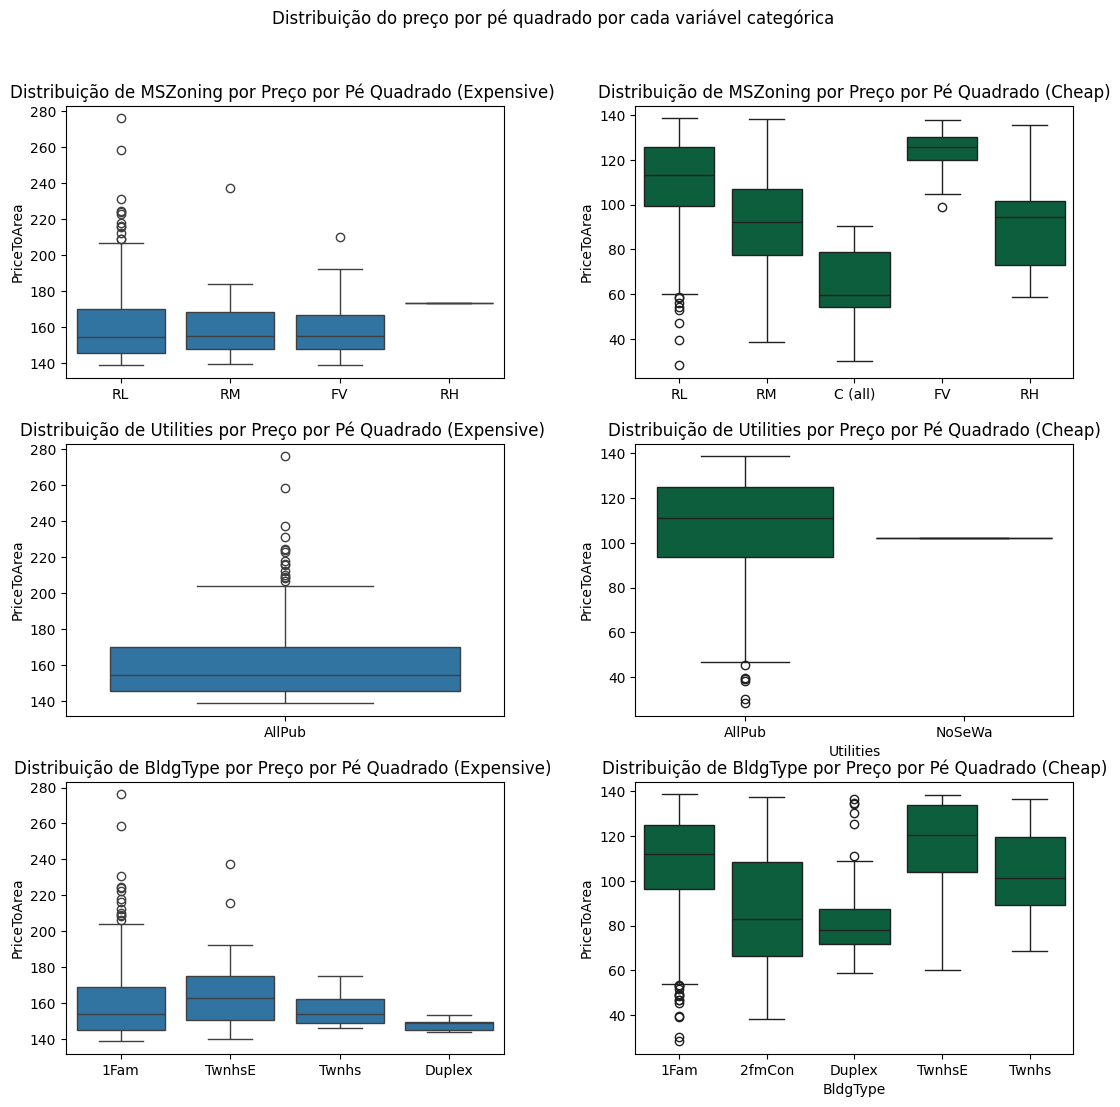

In [272]:
colunas_categoricas = [x for x in df.columns if df[x].dtypes == 'object' and x not in ['CatPrice','CatPriceToArea']]
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(13,12))
ax = ax.flatten()
plt.suptitle('Distribuição do preço por pé quadrado por cada variável categórica')
plt.subplots_adjust(hspace=0.244,top=0.9,wspace=0.3)
for i,col in enumerate(colunas_categoricas):
    sns.boxplot(x=col,y='PriceToArea',data=df[df['CatPriceToArea']=='Expensive'],ax=ax[i*2])
    ax[i*2].set_title(f'Distribuição de {col} por Preço por Pé Quadrado (Expensive) ')
    ax[i*2].set(xlabel='') 

    sns.boxplot(x=col,y='PriceToArea',data=df[df['CatPriceToArea']=='Cheap'],ax=ax[i*2 +1],color='#006B3F')
    ax[i*2+1].set_title(f'Distribuição de {col} por Preço por Pé Quadrado (Cheap)')
    ax[i*+1].set(xlabel='') 

Verificando as variáveis categóricas em relação ao preçço por pé quadrado, temos as seguintes observações: 

Para as zonas de classifição, continuamos observando que os imóveis de menor preço por pé quadrado estão na área comercial e os com maiores estão nas zonas RL (Residencial de baixa densidade), RM (Residencial de média densidade) e FV (Residencial de Vilarejo Flutuante). 

Para a variável de tipo de habitação podemos perceber que os imóveis considerados caros ainda são do tipo 1Fam e TwnhsE, porém tivemos a inclusão de uma nova categoria, a categoria duplex.

## Conclusões 

Inicialmente, é importante destacar que esta análise foi realizada com o propósito de praticar conceitos de estatística descritiva, utilizando apenas análise univariada. Para obtermos conclusões mais aprofundadas sobre o assunto, seria necessário empregar técnicas mais avançadas, como análise multivariada, testes de hipóteses e até mesmo aprendizado de máquina. Essas abordagens serão exploradas mais detalhadamente ao longo do curso, e novas análises serão conduzidas para fornecer insights mais robustos.

Dito isso, vamos às conclusões.

Observamos que variáveis como tamanho da área, nota de qualidade do material, total de quartos e cômodos exercem influência sobre o preço de venda do imóvel. Contudo, é crucial ter cautela ao considerá-las como fatores predominantes para classificar um imóvel como caro ou barato. Ao analisarmos o preço por pé quadrado do imóvel, percebemos que essas variáveis não mantêm a mesma significância em comparação com o preço de venda total. Isso pode ser atribuído ao fato de que alguns imóveis com áreas menores foram vendidos a preços mais elevados do que imóveis com áreas maiores, ou seja, possuímos instâncias de classificação diferentes na mesma faixa de preço.

A hipótese mais plausível para explicar o preço elevado seria a zona de classificação do imóvel (localização) e seu tipo de habitação. Constatamos que imóveis localizados em zonas residenciais de baixa e média densidade, além do tipo de habitação unifamiliar (1Fam) e unidades de canto final (TwnhsE), apresentam preços de venda e preços por pé quadrado mais elevados. Em resumo, essas variáveis se destacam como as mais relevantes em nosso conjunto de dados para distinguir se um imóvel pode ser considerado caro ou barato.